In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate
from scipy import signal

In [4]:
pd.__version__

'1.3.5'

In [52]:
from analysis import molly

In [53]:
molly.extract_points()

TypeError: extract_points() missing 2 required positional arguments: 'file' and 'bodyparts'

In [99]:
#just for this test case set the path to your file so that it's easier to work with
csv = '/Users/mollyshallow/Desktop/Wehr_Lab/0898/2022-02-22_8-15-13_mouse-0898/Sky_mouse-0898_2022-02-22T08_15_13DLC_dlcrnetms5_optopreycapFeb16shuffle1_150000_el_filtered.csv'
#ok right now this isn't the right csv, this is just the time series info, need the DLC output, need to grab a few

In [100]:
csv

'/Users/mollyshallow/Desktop/Wehr_Lab/0898/2022-02-22_8-15-13_mouse-0898/Sky_mouse-0898_2022-02-22T08_15_13DLC_dlcrnetms5_optopreycapFeb16shuffle1_150000_el_filtered.csv'

In [101]:
#set the standard values that will be used for conversions later
pixpercm=14.5 #this value is from spring term, need to figure this one out for our cam
thresh=0.75
framerate=200

In [102]:
#turn the csv into a dataframe, this might be a little iffy with all of the data, possible to just include a subset
data=pd.read_csv(csv, skiprows=[0,1], header=[0,1],index_col=[0]).loc[:,['Rear','Lear','anteriorC','posteriorC']]

In [103]:
data

bodyparts     Rear                         Lear                     anteriorC  \
coords           x        y likelihood        x        y likelihood         x   
0          694.885  109.091        1.0  716.819   81.464        1.0       NaN   
1          695.034  109.091        1.0  717.193   81.520        1.0       NaN   
2          695.042  109.091        1.0  717.511   81.803        1.0       NaN   
3          695.424  109.032        1.0  717.616   82.064        1.0       NaN   
4          695.459  108.853        1.0  718.175   83.411        1.0       NaN   
...            ...      ...        ...      ...      ...        ...       ...   
9315       615.626  487.217        1.0  630.924  516.897        1.0       NaN   
9316       615.626  487.217        1.0  631.170  516.849        1.0  1162.082   
9317       615.647  487.024        1.0  631.170  516.843        1.0  1161.881   
9318       615.626  486.031        1.0  630.924  516.702        1.0  1156.948   
9319       615.626  485.822        1.0  630.924  516.667        1.0       NaN   

bodyparts                     posteriorC                 
coords           y likelihood          x   y likelihood  
0              NaN        NaN        NaN NaN        NaN  
1              NaN        NaN        NaN NaN        NaN  
2              NaN        NaN        NaN NaN        NaN  
3              NaN        NaN        NaN NaN        NaN  
4              NaN        NaN        NaN NaN        NaN  
...            ...        ...        ...  ..        ...  
9315           NaN        NaN        NaN NaN        NaN  
9316       283.269      0.734        NaN NaN        NaN  
9317       283.005      0.607        NaN NaN        NaN  
9318       282.968      0.662        NaN NaN        NaN  
9319           NaN        NaN        NaN NaN        NaN  

[9320 rows x 12 columns]

In [104]:
#load your dlc points for the  mouse 
rear_x=data['Rear','x'].to_numpy()/pixpercm
rear_y=data['Rear','y'].to_numpy()/pixpercm

lear_x=data['Lear','x'].to_numpy()/pixpercm
lear_y=data['Lear','y'].to_numpy()/pixpercm

#create arrays that tie together xy points for each ear
rear_xy=np.asarray([rear_x,rear_y])
lear_xy=np.asarray([lear_x,lear_y])
#create an array of one identifying head point for the mouse using the average of the ear points
mouse_xy=0.5*(rear_xy+lear_xy)

In [105]:
#load cricket points and cricket probability
#cricket probability will be used to threshold the data and interpolate if necessary
#not quite identical to mouse points because there are two cricket points and we want the average
cricket_p=(data['anteriorC','likelihood'].to_numpy()+data['posteriorC','likelihood'].to_numpy())/2
cricket_x=(data['anteriorC','x'].to_numpy()+data['posteriorC','x'].to_numpy())/2
cricket_y=(data['anteriorC','y'].to_numpy()+data['posteriorC','y'].to_numpy())/2
cricket_x=cricket_x/pixpercm
cricket_y=cricket_y/pixpercm
#threshold out cricket values with low probability 
thresh_cricket_x=cricket_x.copy()
thresh_cricket_x[cricket_p<thresh]=np.nan
thresh_cricket_y=cricket_y.copy()
thresh_cricket_y[cricket_p<thresh]=np.nan
#create array with xy points for cricket that are average of the front and back values, thresholded
cricket_xy=[thresh_cricket_x, thresh_cricket_y]

/Users/mollyshallow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()
/Users/mollyshallow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]


In [106]:
cricket_xy

[array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan])]

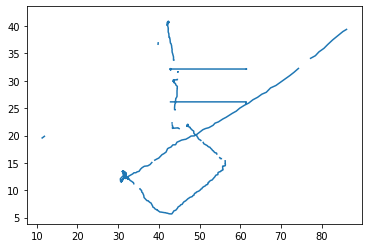

In [107]:
plt.plot(cricket_xy[0], cricket_xy[1])
# plt.plot(mouse_xy[0], mouse_xy[1])

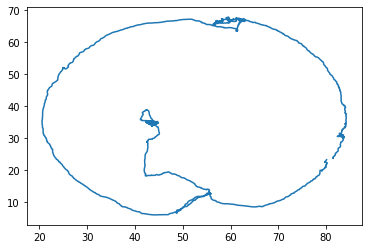

In [108]:
plt.plot(mouse_xy[0], mouse_xy[1])

In [109]:
ind = np.arange(0,len(thresh_cricket_x))
interp = interpolate.interp1d(ind[~np.isnan(thresh_cricket_x)], thresh_cricket_x[~np.isnan(thresh_cricket_x)],bounds_error=False, fill_value=np.nan )
cricket_x_interp = interp(ind)

ind = np.arange(0,len(thresh_cricket_y))
interp = interpolate.interp1d(ind[~np.isnan(thresh_cricket_y)], thresh_cricket_y[~np.isnan(thresh_cricket_y)],bounds_error=False, fill_value=np.nan)
cricket_y_interp = interp(ind)

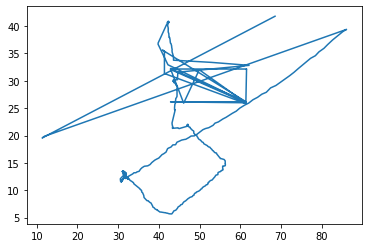

In [110]:
plt.plot(cricket_x_interp,cricket_y_interp)

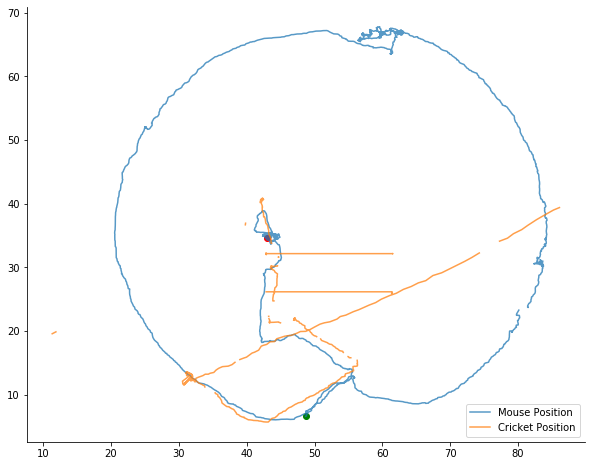

In [111]:
plt.figure(figsize=(10,8))
plt.plot(mouse_xy[0], mouse_xy[1], alpha=0.75, label='Mouse Position')
plt.plot(cricket_xy[0], cricket_xy[1], alpha=0.75, label='Cricket Position')
# plt.scatter(cricket_x_interp[0], cricket_y_interp[0], color='g')
# plt.scatter(cricket_x_interp[-1], cricket_y_interp[-1], color='r')
plt.scatter(mouse_xy[0][0], mouse_xy[1][0], color='g')
plt.scatter(mouse_xy[0][-1], mouse_xy[1][-1], color='r')
sns.despine()
plt.legend(loc='lower right')
# plt.savefig('interp_dlcpos.png')
plt.show()


In [112]:
captureT = np.max(np.where(~np.isnan(cricket_xy[0])))/framerate-np.min(np.where(~np.isnan(cricket_xy[0])))/framerate # return this
movieT = len(cricket_p)/framerate
if captureT.size==0:
    captureT = movieT
end=len(cricket_xy[0])/framerate
timestamps=np.linspace(0,end,len(cricket_xy[0]))
start=np.min(np.where(~np.isnan(cricket_xy[0])))
stop=np.max(np.where(~np.isnan(cricket_xy[0])))

In [113]:
captureT

41.894999999999996

In [114]:
dist = np.sqrt(np.square(thresh_cricket_x- mouse_xy[0]) + np.square(thresh_cricket_y - mouse_xy[1])) #cmn - changes to cricket_x instead of interp.
# dist[-1] = 0  # we know that last point should be 0 range, since it's capture
dist

array([nan, nan, nan, ..., nan, nan, nan])

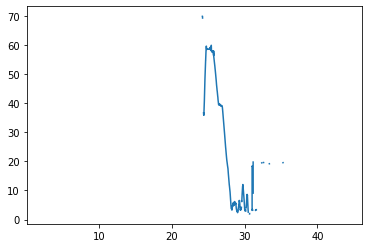

In [115]:
plt.plot( timestamps,dist)

In [116]:
ind = np.arange(0,len(dist))
interp = interpolate.interp1d(ind[~np.isnan(dist)], dist[~np.isnan(dist)],bounds_error=False, fill_value=np.nan )
range_interp = interp(ind)
dist = range_interp

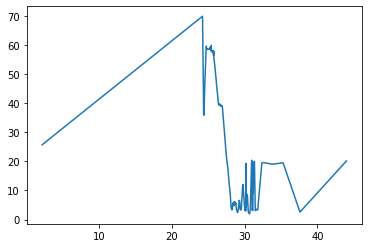

In [117]:
plt.plot(timestamps[start:stop],dist[start:stop])

In [118]:
dist[stop]

nan

In [119]:
win = 12
dx = np.diff(mouse_xy[0])
dx = np.convolve(dx,np.ones(win)/win, 'same')
dy = np.diff(mouse_xy[1])
dy = np.convolve(dy,np.ones(win)/win, 'same')
spd = (np.sqrt(np.square(dx)+np.square(dy)))*framerate

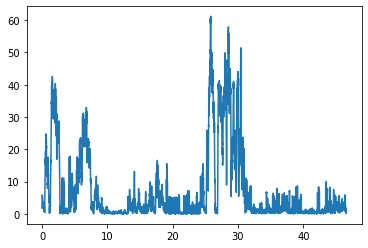

In [120]:
plt.plot(timestamps[0:-1],spd)

In [121]:
mouse_az = np.arctan2((cricket_xy[1] - mouse_xy[1]),(cricket_xy[0] - mouse_xy[0]))*180/np.pi
head_az = np.arctan2((rear_xy[1] - lear_xy[1]),(rear_xy[0] - lear_xy[0]))*180/np.pi -90
az = mouse_az-head_az
az = np.mod(az+180,360)-180
if np.sum(~np.isnan(az))>0:
    azOld = az
    ind = np.arange(0,len(az))
    interp = interpolate.interp1d(ind[~np.isnan(az)], az[~np.isnan(az)],bounds_error=False, fill_value=np.nan )
    az = interp(ind)

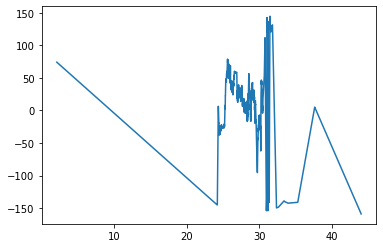

In [122]:
plt.plot(timestamps,az)

In [123]:
approach = []
paired = list(zip(az,spd))
for pair in paired:
    if np.abs(pair[0]) < 30 and pair[1] > 5:
        approach.append(1)
    else:
        approach.append(0)

approach = signal.medfilt(approach, 101) # 101 is hardcoded half a second based on framerate
approach = np.asarray(approach)

approachStarts = np.where(np.diff(approach)>0)
approachEnds = np.where(np.diff(approach)<0)
firstApproach = np.min(approachStarts)
timetoapproach = timestamps[firstApproach] # return this
freqapproach=np.size(approachStarts) / movieT # return this

In [124]:
firstApproach/framerate

6.58

In [125]:
timetoapproach

6.580706084343815

In [126]:
freqapproach

0.1072961373390558

In [127]:
approachEnds

(array([1501, 1685, 4914, 5912, 6077]),)

In [128]:
intercept = []
maybeIntercept = np.take(dist, approachEnds) # uses approachEnds to index dist
maybeIntercept = maybeIntercept[0] # np.take returns tuple, first value are the ones you one
maybeIntercept[-1] = 0 # assuming last approach is intercept/capture, makes things werk

for i in maybeIntercept:
    if i < 5:
        intercept.append(1)
    else:
        intercept.append(0)

# calculate probability of intercept given approach
tot_approach = np.size(approachEnds)
tot_intercept = sum(intercept)
prob_inter = tot_intercept / tot_approach

# calculate the probability of capture given contact - 1/number of intercepts
if tot_intercept>0:
    prob_capture = 1 / tot_intercept
else:
    print('no capture')

In [129]:
prob_capture

0.5

In [130]:
prob_inter

0.4

In [131]:
freqapproach

0.1072961373390558

In [132]:
timetoapproach

6.580706084343815

In [133]:
captureT

41.894999999999996

In [134]:
file=csv
bodyparts=['Rear','Lear','anteriorC','posteriorC']


In [135]:
bodyparts

['Rear', 'Lear', 'anteriorC', 'posteriorC']

In [136]:
file

'/Users/mollyshallow/Desktop/Wehr_Lab/0898/2022-02-22_8-15-13_mouse-0898/Sky_mouse-0898_2022-02-22T08_15_13DLC_dlcrnetms5_optopreycapFeb16shuffle1_150000_el_filtered.csv'

In [137]:
data=pd.read_csv(file, skiprows=[0,1], header=[0,1])

In [138]:
data

bodyparts     nose                         Rear                      \
        coords        x        y likelihood        x        y likelihood   
0            0  727.615  120.644        1.0  694.885  109.091        1.0   
1            1  727.847  120.671        1.0  695.034  109.091        1.0   
2            2  727.847  121.480        1.0  695.042  109.091        1.0   
3            3  727.615  121.480        1.0  695.424  109.032        1.0   
4            4  727.478  121.480        1.0  695.459  108.853        1.0   
...        ...      ...      ...        ...      ...      ...        ...   
9315      9315      NaN      NaN        NaN  615.626  487.217        1.0   
9316      9316      NaN      NaN        NaN  615.626  487.217        1.0   
9317      9317      NaN      NaN        NaN  615.647  487.024        1.0   
9318      9318      NaN      NaN        NaN  615.626  486.031        1.0   
9319      9319      NaN      NaN        NaN  615.626  485.822        1.0   

         Lear                      ...      spine tailbase           \
            x        y likelihood  ... likelihood        x        y   
0     716.819   81.464        1.0  ...        1.0  636.379   74.725   
1     717.193   81.520        1.0  ...        1.0  636.379   74.725   
2     717.511   81.803        1.0  ...        1.0  636.395   74.725   
3     717.616   82.064        1.0  ...        1.0  636.518   74.725   
4     718.175   83.411        1.0  ...        1.0  637.038   74.476   
...       ...      ...        ...  ...        ...      ...      ...   
9315  630.924  516.897        1.0  ...        1.0  681.283  443.071   
9316  631.170  516.849        1.0  ...        1.0  681.042  443.071   
9317  631.170  516.843        1.0  ...        1.0  681.022  443.140   
9318  630.924  516.702        1.0  ...        1.0  680.995  443.140   
9319  630.924  516.667        1.0  ...        1.0  680.911  443.140   

                anteriorC                     posteriorC                 
     likelihood         x        y likelihood          x   y likelihood  
0           1.0       NaN      NaN        NaN        NaN NaN        NaN  
1           1.0       NaN      NaN        NaN        NaN NaN        NaN  
2           1.0       NaN      NaN        NaN        NaN NaN        NaN  
3           1.0       NaN      NaN        NaN        NaN NaN        NaN  
4           1.0       NaN      NaN        NaN        NaN NaN        NaN  
...         ...       ...      ...        ...        ...  ..        ...  
9315        1.0       NaN      NaN        NaN        NaN NaN        NaN  
9316        1.0  1162.082  283.269      0.734        NaN NaN        NaN  
9317        1.0  1161.881  283.005      0.607        NaN NaN        NaN  
9318        1.0  1156.948  282.968      0.662        NaN NaN        NaN  
9319        1.0       NaN      NaN        NaN        NaN NaN        NaN  

[9320 rows x 25 columns]

In [139]:
data=data.loc[:, bodyparts]

In [140]:
data

Rear                         Lear                     anteriorC  \
            x        y likelihood        x        y likelihood         x   
0     694.885  109.091        1.0  716.819   81.464        1.0       NaN   
1     695.034  109.091        1.0  717.193   81.520        1.0       NaN   
2     695.042  109.091        1.0  717.511   81.803        1.0       NaN   
3     695.424  109.032        1.0  717.616   82.064        1.0       NaN   
4     695.459  108.853        1.0  718.175   83.411        1.0       NaN   
...       ...      ...        ...      ...      ...        ...       ...   
9315  615.626  487.217        1.0  630.924  516.897        1.0       NaN   
9316  615.626  487.217        1.0  631.170  516.849        1.0  1162.082   
9317  615.647  487.024        1.0  631.170  516.843        1.0  1161.881   
9318  615.626  486.031        1.0  630.924  516.702        1.0  1156.948   
9319  615.626  485.822        1.0  630.924  516.667        1.0       NaN   

                         posteriorC                 
            y likelihood          x   y likelihood  
0         NaN        NaN        NaN NaN        NaN  
1         NaN        NaN        NaN NaN        NaN  
2         NaN        NaN        NaN NaN        NaN  
3         NaN        NaN        NaN NaN        NaN  
4         NaN        NaN        NaN NaN        NaN  
...       ...        ...        ...  ..        ...  
9315      NaN        NaN        NaN NaN        NaN  
9316  283.269      0.734        NaN NaN        NaN  
9317  283.005      0.607        NaN NaN        NaN  
9318  282.968      0.662        NaN NaN        NaN  
9319      NaN        NaN        NaN NaN        NaN  

[9320 rows x 12 columns]

In [141]:
def extract_points(file, bodyparts, fr=200, pix2cm=14.5, thresh=0.7 ):
    '''
    function to extract mouse and cricket xy positions from DLC output csv
    will also get the likelihood values for cricket positions
    can be adapted later to add extraction of likelihood for the mouse

    INPUTS:
        file: str; filename/ path to the DLC output
        bodyparts: list; list of the bodypart labels from DLC you need 
                added as an input since names vary across models
        fr: int; framerate of videos, default=200
        pix2cm: int; conversion from pixels to cm, default=14.5 (needs to be checked)
        thresh: int, threshold for likelihood values, default=0.7
    RETURNS:
        mouse_xy: array; xy coordinates for the mouse across the trial
        cricket_xy: array; xy coordinates for the cricket across trial,
                cricket_xy is filtered to remove points with low likelihood
        cricket_p: array; likelihood values of cricket points

    '''
    #set the constant values that will be used throughout
    #load relevant dlc points from the csv, limits the amount you have to work with
    data=pd.read_csv(file, skiprows=[0,1], header=[0,1])
    data=data.loc[:, bodyparts]

    #create 2d array for mouse xy coordinates
    #right now indexing df depends on order of your bodyparts lists, find a better way to deal with this
    rear_x=data[bodyparts[0],'x'].to_numpy()
    rear_y=data[bodyparts[0],'y'].to_numpy()
    
    lear_x=data[bodyparts[1],'x'].to_numpy()
    lear_y=data[bodyparts[1],'y'].to_numpy()

    rear_xy=np.asarray([rear_x,rear_y])
    lear_xy=np.asarray([lear_x,lear_y])

    mouse_xy=0.5*(rear_xy+lear_xy)/pix2cm

    #extract cricket likelihood and xy coordinates, same indexing issue 
    print(thresh)
    cricket_p=(data[bodyparts[2],'likelihood'].to_numpy()+data[bodyparts[3],'likelihood'].to_numpy())/2
    cricket_x=(data[bodyparts[2],'x'].to_numpy()+data[bodyparts[3],'x'].to_numpy())/2*pix2cm
    cricket_y=(data[bodyparts[2],'y'].to_numpy()+data[bodyparts[3],'y'].to_numpy())/2*pix2cm

    thresh_cricket_x=cricket_x.copy()
    thresh_cricket_x[cricket_p<thresh]=np.nan
    thresh_cricket_y=cricket_y.copy()
    thresh_cricket_y[cricket_p<thresh]=np.nan

    cricket_xy=[thresh_cricket_x, thresh_cricket_y]

    return mouse_xy, cricket_p, cricket_xy, rear_xy, lear_xy 

In [142]:
 mouse_xy, cricket_p, cricket_xy, rear_xy, lear_xy = extract_points(file=csv, bodyparts=bodyparts, thresh=0.9)

0.9


/Users/mollyshallow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in less
/Users/mollyshallow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in less


In [143]:
mouse_xy

array([[48.67944828, 48.69748276, 48.70872414, ..., 42.99368966,
        42.98448276, 42.98448276],
       [ 6.57086207,  6.5727931 ,  6.58255172, ..., 34.61610345,
        34.577     , 34.56858621]])

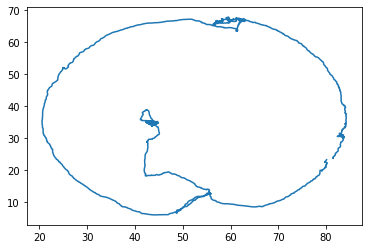

In [144]:
plt.plot(mouse_xy[0], mouse_xy[1])


In [145]:
    win = 12
    cricket_dx = np.diff(cricket_xy[0])
    cricket_dx = np.convolve(cricket_dx,np.ones(win)/win, 'same')
    cricket_dy = np.diff(cricket_xy[1])
    cricket_dy = np.convolve(cricket_dy,np.ones(win)/win, 'same')
    cricket_spd = (np.sqrt(np.square(cricket_dx)+np.square(cricket_dy)))*framerate

In [146]:
cricket_spd

array([nan, nan, nan, ..., nan, nan, nan])

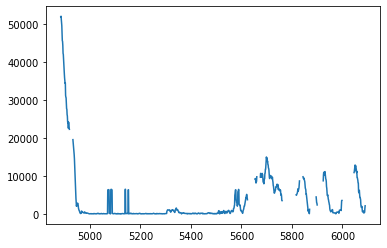

In [147]:
plt.plot(cricket_spd)

In [148]:
def geometries(cricket_xy, mouse_xy, rear_xy, lear_xy, fr=200):
    '''
    function to calculate geometric variables from DLC points
    these geometries can then be used for metrics such as time to capture
    potential to be adapted to calculate all geometries needed for HMM
    run extract_points before running this to get needed coordinates
    
    INPUTS:
        cricket_xy: array; thresholded cricket xy coordinates
        mouse_xy: array; mouse xy coordinates
        rear_xy: array; xy coordinates of right ear, needed for azimuth calc
        lear_xy: array; xy coordinates of left ear, needed for azimuth calc
        fr: int; framerate of videos, default=200

    RETURNS:
        range: array; distance between mouse and cricket 
        mouse_spd: array; mouse speed 
        cricket_spd: array; cricket speed
        az: array; azimuth (angle of mouse head to cricket)
    '''
    #calculate the distance between the mouse and cricket
    dist = np.sqrt(np.square(cricket_xy[0]- mouse_xy[0]) + np.square(cricket_xy[1] - mouse_xy[1])) 
    dist[-1]=0 #we can think about if we want this but last point should be the capture?
    #interpolate the range values to make up for dropped cricket points 
    ind = np.arange(0,len(dist))
    interp = interpolate.interp1d(ind[~np.isnan(dist)], dist[~np.isnan(dist)],bounds_error=False, fill_value=np.nan )
    range_interp = interp(ind)
    dist = range_interp

    #calculate mouse speed, can add to this later to do velocity in x and y 
    win = 12
    mouse_dx = np.diff(mouse_xy[0])
    mouse_dx = np.convolve(mouse_dx,np.ones(win)/win, 'same')
    mouse_dy = np.diff(mouse_xy[1])
    mouse_dy = np.convolve(mouse_dy,np.ones(win)/win, 'same')
    mouse_spd = (np.sqrt(np.square(mouse_dx)+np.square(mouse_dy)))*fr

    #calculate cricket speed, can also change this to velocities later
    win = 12
    cricket_dx = np.diff(cricket_xy[0])
    cricket_dx = np.convolve(cricket_dx,np.ones(win)/win, 'same')
    cricket_dy = np.diff(cricket_xy[1])
    cricket_dy = np.convolve(cricket_dy,np.ones(win)/win, 'same')
    cricket_spd = (np.sqrt(np.square(cricket_dx)+np.square(cricket_dy)))*fr
    #probably need to do some interpolation on these values, but not sure how well this would work right now 

    #calculate azimuth 
    #right now goes from -180 to 180 to show the direction, but this can cause large jumps in the plotting
    #could shift it to just going from 0 to 180 and indicate which direction the mouse is some other way 
    mouse_az = np.arctan2((cricket_xy[1] - mouse_xy[1]),(cricket_xy[0] - mouse_xy[0]))*180/np.pi
    head_az = np.arctan2((rear_xy[1] - lear_xy[1]),(rear_xy[0] - lear_xy[0]))*180/np.pi -90
    az = mouse_az-head_az
    az = np.mod(az+180,360)-180
    if np.sum(~np.isnan(az))>0:
        azOld = az
        ind = np.arange(0,len(az))
        interp = interpolate.interp1d(ind[~np.isnan(az)], az[~np.isnan(az)],bounds_error=False, fill_value=np.nan )
        az = interp(ind)

    return dist, mouse_spd, cricket_spd, az

In [149]:
dist, mouse_spd, cricket_spd, az=geometries(mouse_xy=mouse_xy, cricket_xy=cricket_xy, rear_xy=rear_xy, lear_xy=lear_xy)

In [150]:
cricket_spd

array([nan, nan, nan, ..., nan, nan, nan])

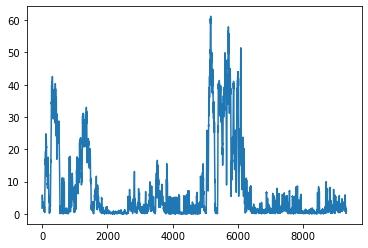

In [151]:
plt.plot(mouse_spd)

In [152]:
np.shape(cricket_p)

(9320,)

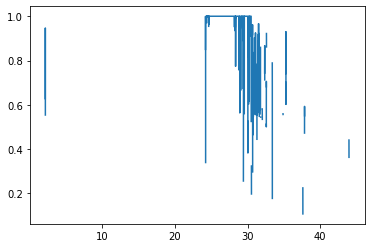

In [153]:
plt.plot(timestamps, cricket_p)

In [154]:
new_thresh=0.99
start2end= np.where(cricket_p>new_thresh)[0]
start2end

/Users/mollyshallow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


array([4840, 4869, 4870, ..., 6094, 6095, 6096])

In [155]:
start=start2end[0]

In [156]:
end=start2end[-1]

In [157]:
end-start

1256

In [158]:
start2end[-1]/framerate

30.48

In [159]:
firstApproach/framerate

6.58

In [160]:
np.size(approachStarts)

5

In [161]:
approachStarts[0]/framerate

array([ 6.58 ,  8.065, 24.495, 26.995, 29.83 ])

In [162]:
start/framerate

24.2

In [163]:
paired = list(zip(az,spd))

In [164]:
approach = []
for pair in paired:
    if np.abs(pair[0]) < 30 and pair[1] > 5:
        approach.append(1)
    else:
        approach.append(0)

approach = signal.medfilt(approach, 101) # 101 is hardcoded half a second based on framerate
approach = np.asarray(approach)

approachStarts = np.where(np.diff(approach)>0)
approachEnds = np.where(np.diff(approach)<0)
firstApproach = np.min(approachStarts)
timetoapproach = timestamps[firstApproach] # return this
freqapproach=np.size(approachStarts) / movieT # return this

In [165]:
firstApproach/framerate

2.25

In [166]:
np.where(approachStarts[0]>start)[0][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [167]:
approach

array([0., 0., 0., ..., 0., 0., 0.])

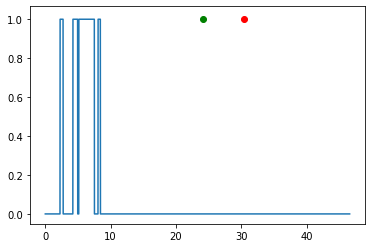

In [168]:
plt.plot(timestamps[0:-1],approach)
plt.scatter(start/framerate, 1,color='g')
plt.scatter(end/framerate, 1, color='r')

In [169]:
np.where(approach!=0)[0]/framerate

array([2.255, 2.26 , 2.265, 2.27 , 2.275, 2.28 , 2.285, 2.29 , 2.295,
       2.3  , 2.305, 2.31 , 2.315, 2.32 , 2.325, 2.33 , 2.335, 2.34 ,
       2.345, 2.35 , 2.355, 2.36 , 2.365, 2.37 , 2.375, 2.38 , 2.385,
       2.39 , 2.395, 2.4  , 2.405, 2.41 , 2.415, 2.42 , 2.425, 2.43 ,
       2.435, 2.44 , 2.445, 2.45 , 2.455, 2.46 , 2.465, 2.47 , 2.475,
       2.48 , 2.485, 2.49 , 2.495, 2.5  , 2.505, 2.51 , 2.515, 2.52 ,
       2.525, 2.53 , 2.535, 2.54 , 2.545, 2.55 , 2.555, 2.56 , 2.565,
       2.57 , 2.575, 2.58 , 2.585, 2.59 , 2.595, 2.6  , 2.605, 2.61 ,
       2.615, 2.62 , 2.625, 2.63 , 2.635, 2.64 , 2.645, 2.65 , 2.655,
       2.66 , 2.665, 2.67 , 2.675, 2.68 , 2.685, 2.69 , 2.695, 2.7  ,
       2.705, 2.71 , 2.715, 2.72 , 4.22 , 4.225, 4.23 , 4.235, 4.24 ,
       4.245, 4.25 , 4.255, 4.26 , 4.265, 4.27 , 4.275, 4.28 , 4.285,
       4.29 , 4.295, 4.3  , 4.305, 4.31 , 4.315, 4.32 , 4.325, 4.33 ,
       4.335, 4.34 , 4.345, 4.35 , 4.355, 4.36 , 4.365, 4.37 , 4.375,
       4.38 , 4.385,

In [170]:
def preycap_metrics(cricket_xy, cricket_p, dist, mouse_spd, az, fr=200, oldmodel=True):
        '''
        function to calculate basic metrics of prey capture behavior
        decent first pass look at if there are differences between conditions
        
        INPUTS:
            cricket_xy: array; thresholded cricket xy coordinates
            cricket_p: array; cricket likelihoods
            dist: array; distance between mouse and cricket
            mouse_spd: array; mouse speed (not velocity)
            az: array; angle between mouse's head and cricket 
            fr: int; framerate of videos, default=200
            oldmodel: boolean; flag to mark cricket likelihood is bad, default=True

        RETURNS:
            captureT: int; time to capture the cricket --indication of start and end need to be changed 
            latency: int; time to the first approach
            freqapproach: int; frequency of initiating approaches 
            p_intercept: int; probability of intercepting given an approach
            p_capture: int; probability of capturing given intercepting 
        '''
        #calculate the time to capture, right now running with a new, higher threshold than other calculations
        #have if/else statement so that if new models in the future fix things but we don't want to re run old data 
        newthresh=0.99
        movieT=len(cricket_p)/fr 
        if oldmodel==True:
            start2end=np.where(cricket_p>newthresh)[0]
            captureT=(start2end[-1]-start2end[0])/fr 
        else:
            captureT=(np.max(np.where(~np.isnan(cricket_xy)))-np.min(np.where(~np.isnan(cricket_xy))))/fr 
        if captureT.size==0:
            captureT=movieT

        #calculate latency and frequency of initiating approaches 
        approach = []
        paired = list(zip(az,mouse_spd))
        for pair in paired:
            if np.abs(pair[0]) < 30 and pair[1] > 5:
                approach.append(1)
            else:
                approach.append(0)

        approach = signal.medfilt(approach, 101) # 101 is hardcoded half a second based on framerate
        approach = np.asarray(approach)

        approachStarts = np.where(np.diff(approach)>0)
        approachEnds = np.where(np.diff(approach)<0)
        firstApproach = np.min(approachStarts)
        timetoapproach = firstApproach/fr # return this
        freqapproach=np.size(approachStarts) / movieT # return this

        #calculate probability of interception given approach, and probability of capture given interception
        intercept = []
        maybeIntercept = np.take(dist, approachEnds) # uses approachEnds to index dist
        maybeIntercept = maybeIntercept[0] # np.take returns tuple, first value are the ones you one
        maybeIntercept[-1] = 0 # assuming last approach is intercept/capture, makes things werk

        for i in maybeIntercept:
            if i < 5:
                intercept.append(1)
            else:
                intercept.append(0)

        # calculate probability of intercept given approach
        tot_approach = np.size(approachEnds)
        tot_intercept = sum(intercept)
        prob_inter = tot_intercept / tot_approach

        # calculate the probability of capture given contact - 1/number of intercepts
        if tot_intercept>0:
            prob_capture = 1 / tot_intercept
        else:
            print('no capture')

        return captureT, freqapproach, timetoapproach, prob_inter, prob_capture

In [171]:
captureT, freqapproach, timetoapproach, prob_inter, prob_capture=preycap_metrics(cricket_xy=cricket_xy, cricket_p=cricket_p, dist=dist, mouse_spd=mouse_spd, az=az)

/Users/mollyshallow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater


In [172]:
prob_capture

1.0